In [1]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt
import tflite_runtime.interpreter as tflite


In [2]:
data = DataLoader.from_folder('./mitrdataset/')


INFO:tensorflow:Load image with size: 604, num_label: 4, labels: cat0, cat1, cat2, cat3.


In [3]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

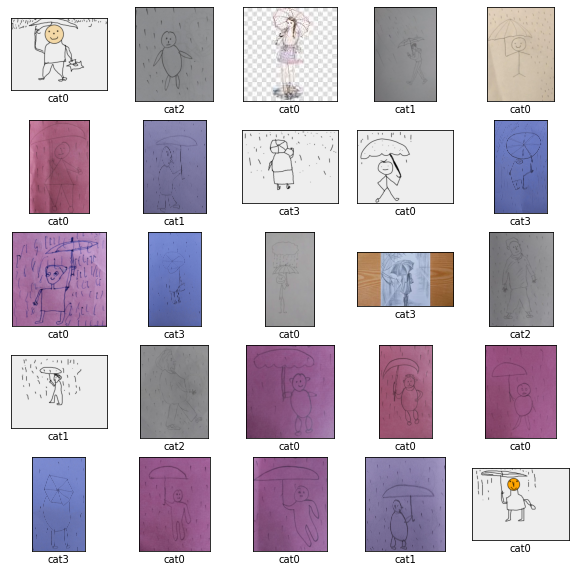

In [4]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [5]:
model = image_classifier.create(train_data, model_spec='resnet_50', validation_data=test_data, epochs=11)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 2048)              23564800  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
_________________________________________________________________
None


/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/11
15/15 [==============================] - 180s 11s/step - loss: 1.4069 - accuracy: 0.4729 - val_loss: 1.1060 - val_accuracy: 0.6230
Epoch 2/11
15/15 [==============================] - 174s 11s/step - loss: 1.1949 - accuracy: 0.6625 - val_loss: 0.9593 - val_accuracy: 0.7377
Epoch 3/11
15/15 [==============================] - 204s 13s/step - loss: 0.8806 - accuracy: 0.7771 - val_loss: 0.9016 - val_accuracy: 0.7705
Epoch 4/11
15/15 [==============================] - 214s 14s/step - loss: 0.7857 - accuracy: 0.8271 - val_loss: 0.8742 - val_accuracy: 0.8197
Epoch 5/11
15/15 [==============================] - 226s 15s/step - loss: 0.6471 - accuracy: 0.8833 - val_loss: 0.8279 - val_accuracy: 0.8033
Epoch 6/11
15/15 [==============================] - 249s 17s/step - loss: 0.6936 - accuracy: 0.8438 - val_loss: 0.8523 - val_accuracy: 0.7705
Epoch 7/11
15/15 [==============================] - 269s 17s/step - loss: 0.6471 - accuracy: 0.8750 - val_loss: 0.8281 - val_accuracy: 0.8033
Epoch 

In [6]:
loss, accuracy = model.evaluate(test_data)
    

2/2 [==============================] - 94s 16s/step - loss: 0.7880 - accuracy: 0.8361


In [7]:
model.export(export_dir='./modelpoints/')


INFO:tensorflow:Assets written to: /tmp/tmp_4fyzfif/assets


INFO:tensorflow:Assets written to: /tmp/tmp_4fyzfif/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpgb358s73/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpgb358s73/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./modelpoints/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./modelpoints/model.tflite


In [8]:
model.export(export_dir='./modelpoints/', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./modelpoints/labels.txt


INFO:tensorflow:Saving labels in ./modelpoints/labels.txt


In [9]:
model.evaluate_tflite('./modelpoints/model.tflite', test_data)

{'accuracy': 0.8360655737704918}

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 2048)              23564800  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
_________________________________________________________________


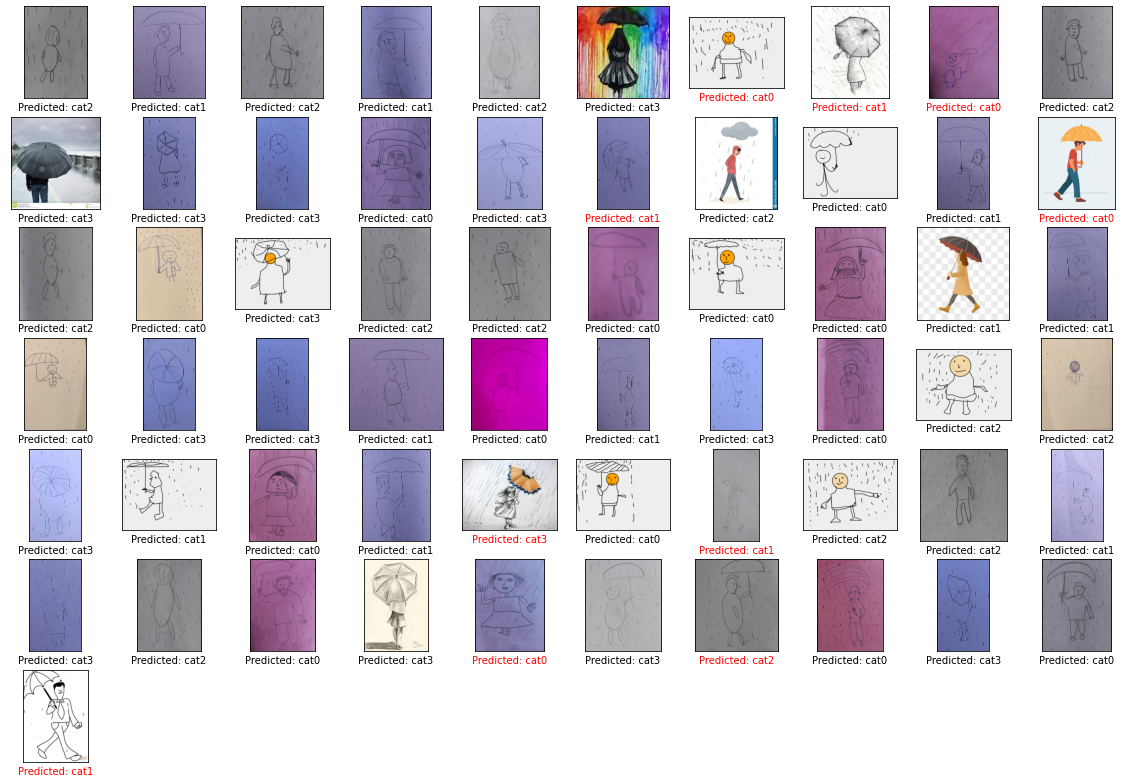

In [11]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()